In [2]:
import pickle
from collections import OrderedDict

%matplotlib inline

In [3]:
with open("out/w2_wikispeedia-experiments.p", "rb") as f:
    results = pickle.load(f)

In [4]:
ks = results["meta"]["ks"]
exp = OrderedDict()

for key, value in results["results"].items():
    exp[key] = {"x": ks, "y": value}

In [5]:
import matplotlib

# define styles

def cmap(i):
    a = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
    return a[(i) % len(a)]

import brewer2mpl
linestyles = ['-', '--', ':', "-."]
colors = brewer2mpl.get_map("Set2", "Qualitative", 5)
def cmap(i):
    a = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
    return colors.hex_colors[i % 5]

linewidth=2.5
style = {
    "links": {
        "label": "link", 
        "color": cmap(0), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[0], 
        "linestyle": "--",
        "linewidth": linewidth},
    "cos": {
        "label": "sim", 
        "color": cmap(1), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[1], 
        "linestyle": "--",
        "linewidth": linewidth},
    "deg": {
        "label": "deg",
        "color": cmap(2), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[6], 
        "linestyle": "--",
        "linewidth": linewidth},
    "cos_deg_at2": {
        "label": "sim,deg",
        "color": cmap(3), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[7], 
        "linestyle": "-",
        "linewidth": linewidth},
    "deg_cos_at2": {
        "label": "deg,sim", 
        "color":  cmap(4), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[8], 
        "linestyle": "-",
        "zorder": 20,
        "linewidth": linewidth},
    "deg_cos_at1": {
        "label": "deg,sim @1", 
        "color":  cmap(1), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[1], 
        "linestyle": "-.",
        "zorder": 18,
        "linewidth": linewidth},
    "deg_cos_at3": {
        "label": "deg,sim @3", 
        "color":  cmap(2), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[0], 
        "linestyle": "--",
        "zorder": 16,
        "linewidth": linewidth},
}

size = (6,2.8)

In [9]:
exp['deg_cos_at2']

{'x': [0,
  0.001,
  0.003,
  0.01,
  0.03,
  0.1,
  0.3,
  1,
  3,
  10,
  30,
  100,
  300,
  1000,
  3000,
  10000,
  30000,
  100000,
  300000,
  1000000,
  3000000,
  10000000,
  30000000,
  100000000],
 'y': [-931915.2486864398,
  -931911.939668177,
  -931905.3230955848,
  -931882.1804297608,
  -931816.189133652,
  -931586.7109643791,
  -930943.0957305756,
  -928809.0745986598,
  -923423.0456039293,
  -908827.2262517338,
  -881089.9433771041,
  -828135.8234280383,
  -758333.8915858953,
  -667639.9413931742,
  -590484.4101677239,
  -534352.1674159765,
  -511607.5853551626,
  -504631.15879154205,
  -504918.411485672,
  -507679.9267730713,
  -510935.4997558594,
  -514755.2141113281,
  -518314.90478515625,
  -522241.244140625]}

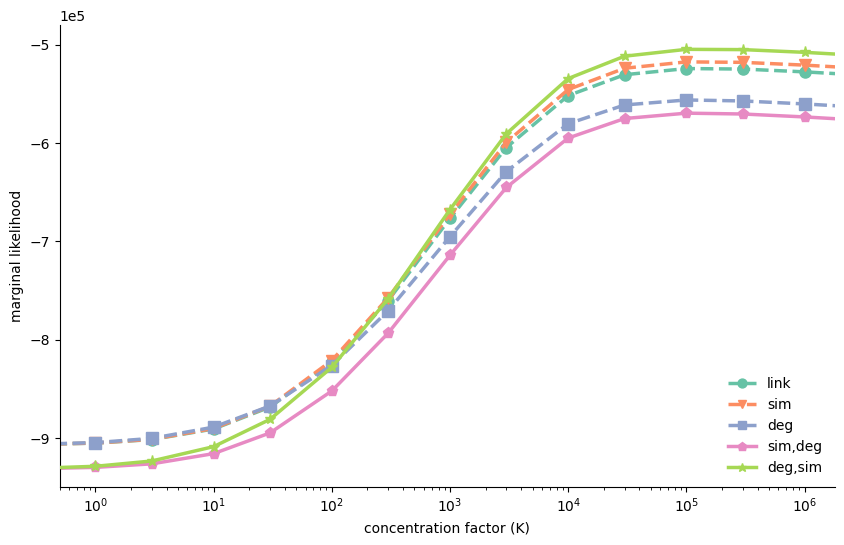

In [5]:
import trails.plot as pl

keys=[
    "links", 
    "cos", 
    "deg", 
    "cos_deg_at2",
    "deg_cos_at2", 
#     "cos_cos_at2", 
#     "deg_deg_at2",
]

fig, ax, leg = pl.plot(exp, style=style, keys=keys, ylim=[-9.5 * 10**5, -4.8 * 10**5], xlim=[0.5,1800000], 
        notebook=False, size=size, axis_labels=True, leg=False, leg_size=(1,2.8), leg_loc="lower right", leg_anchor=(1, 0))
fig.savefig("out/wiki-links.eps", bbox_inches='tight')
leg.savefig("out/wiki-legend.eps", bbox_inches='tight')

fig, ax, leg = pl.plot(exp, style=style, keys=keys, ylim=[-9.5 * 10**5, -4.8 * 10**5], xlim=[0.5,1800000], 
        notebook=True, leg=True, leg_loc="lower right", leg_anchor=(1, 0))
fig

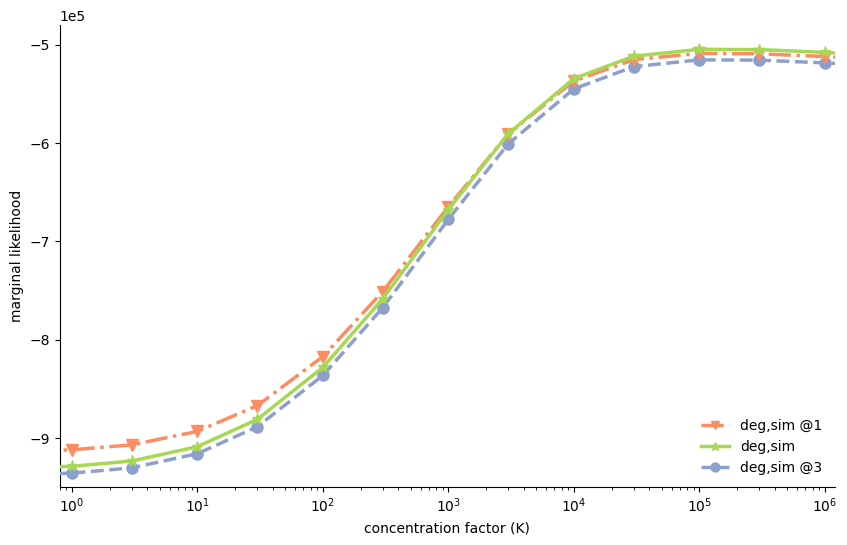

In [7]:
import trails.plot as pl
keys=[
    "deg_cos_at1", 
    "deg_cos_at2", 
    "deg_cos_at3", 
]

fig, ax, leg = pl.plot(exp, style=style, keys=keys, ylim=[-9.5 * 10**5, -4.8 * 10**5], xlim=[0.8,1200000],
                       notebook=False,  size=size, axis_labels=False, leg=True, leg_loc="lower right", leg_anchor=(1, 0))
fig.savefig("out/wiki-params-links.pdf", bbox_inches='tight')
leg.savefig("out/wiki-params-legend.pdf", bbox_inches='tight')

fig, ax, leg = pl.plot(exp, style=style, keys=keys, ylim=[-9.5 * 10**5, -4.8 * 10**5], 
                       notebook=True, xlim=[0.8,1200000], leg_loc="lower right", leg_anchor=(1, 0))
fig